# Quantum Teleportation with Qiskit

## Importing necessary libraries

In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, array_to_latex
#from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

## Initializing a random qubit state

In [23]:
# Create random 1-qubit state
psi = random_statevector(2)

print('psi state: {}'.format(psi))

# Display it in LaTeX
array_to_latex(psi)

psi state: Statevector([-0.27978516+0.28961458j, -0.32761809+0.8546988j ],
            dims=(2,))


<IPython.core.display.Latex object>

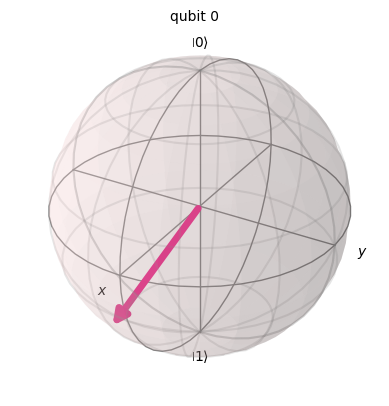

In [24]:
plot_bloch_multivector(psi)

In [25]:
# This was the original script, but is not working, as I cannot load Initialize. Alternative see below
#init_state = Initialize(psi)
#init_state.label = "initial_state"

# alternative Initialization
init_gate = QuantumCircuit(1)
init_gate.initialize(psi, 0)
init_gate.label = "initial_state"
init_gate.draw()

┌────────────────────────────────────────────────┐
q: ┤ Initialize(-0.27979+0.28961j,-0.32762+0.8547j) ├
   └────────────────────────────────────────────────┘

## Essential functions for quantum teleportation protocol

In [26]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

In [27]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [28]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [29]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

## Executing Quantum Teleportation Protocol

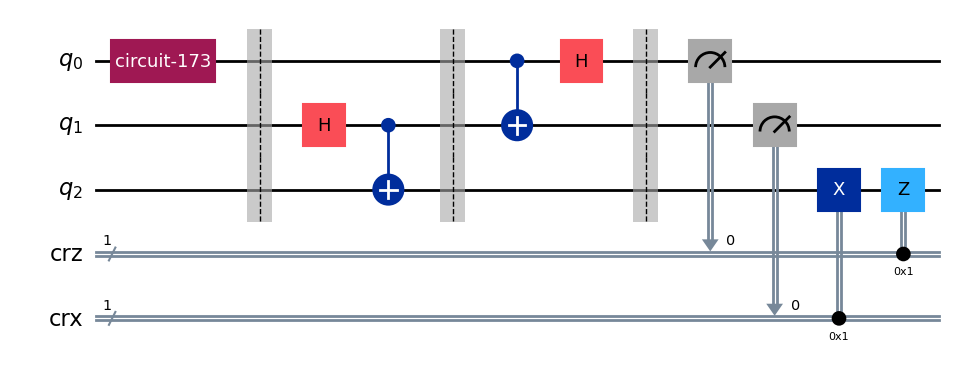

In [30]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw('mpl')

## Simulating our Quantum Teleportation Circuit

In [31]:
# Let's see the result

# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

In [32]:
# Execute the circuit
job = transpile(qc, backend)
qc_output = backend.run(job) # runs the quantum circuit

result = qc_output.result().get_statevector(qc, decimals=3) # get result from the circuit


Quantum state is: Statevector([-0.28 +0.29j , -0.   +0.j   , -0.   +0.j   ,  0.   +0.j   ,
             -0.328+0.855j,  0.   +0.j   , -0.   +0.j   , -0.   +0.j   ],
            dims=(2, 2, 2))


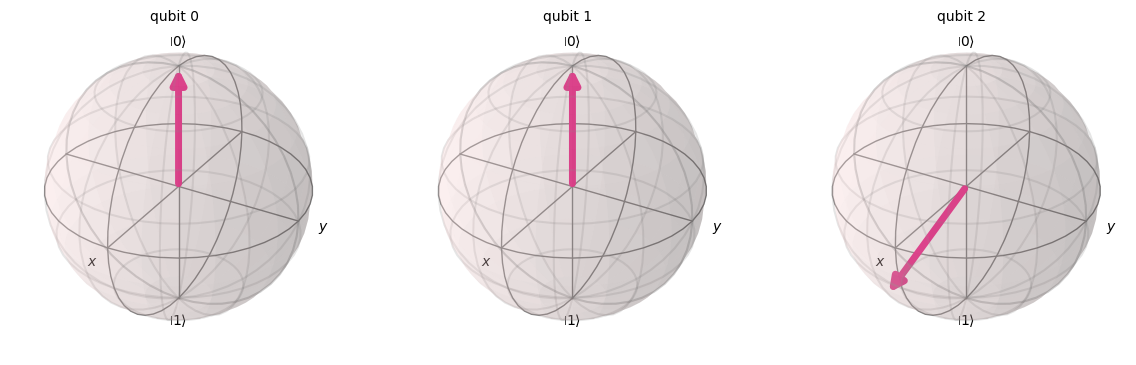

In [33]:
# Printing the state after X gate
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)